# Null Hypothesis Significant Testing

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sstats

# Exercise 1

Computing $p$ values for getting 3 times 6 pips by rolling a die 45 times. Is the die fair?

In [2]:
p_six = 1 / 6
p_six

0.16666666666666666

## Question A

When we intend to stop after 45 rolls.

In [3]:
one_tailed_p_value = sstats.binom.cdf(3, 45, p_six)  # commulative density (/mass) function
one_tailed_p_value

0.04460167210739237

In [4]:
two_tailed_p_value = 2 * one_tailed_p_value
two_tailed_p_value

0.08920334421478474

The one tailed $p$ value is 0.04. Therefore, the two tailed $p$ value is 0.9, hence we don't reject the null hypothesis that the die is fair.

## Question B

When we intend to stop after three 6 pips rolls.

In [5]:
prob_of_getting_three_6_pips_in_less_than_45_rolls = sstats.nbinom.cdf(45 - 3 - 1, 3, p_six)
prob_of_getting_three_6_pips_in_at_least_45_rolls = 1 - prob_of_getting_three_6_pips_in_less_than_45_rolls
prob_of_getting_three_6_pips_in_at_least_45_rolls

0.015631365810663378

The negative binomial distribution defines the probability to fail $x$ times until succeeding $n$ times. In our case the number of failures is $45 - 3 = 42$. So the probability to roll 45 times to achieve three 6 pips rolls is $nbin(45 - 3, 3, 1/6)$.

In [6]:
two_tailed_p_value = 2 * prob_of_getting_three_6_pips_in_at_least_45_rolls
two_tailed_p_value

0.031262731621326756

In this case we will reject the null hypothesis as the two tailed $p$ value is smaller than 5%.

# Exercise 2

NHST confidence intervals and their sensitivity to experimenter's intention.

In [7]:
def plot_p_value(x, p):
    ax = plt.gca()
    ax.plot(x, p)
    ax.axhline(0.05, linestyle='--', color='grey')
    ax.set(xlabel='null parameter', ylabel='$p$ value')

# Question A

CI interval when the intention is to stop after N = 45.

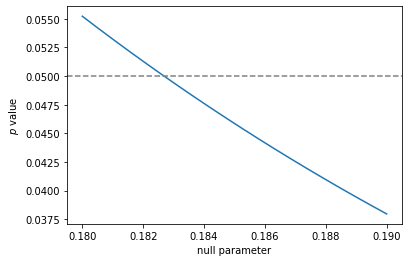

In [8]:
x = np.linspace(0.18, 0.19, 20)
plot_p_value(x, 2 * sstats.binom.cdf(3, 45, x))

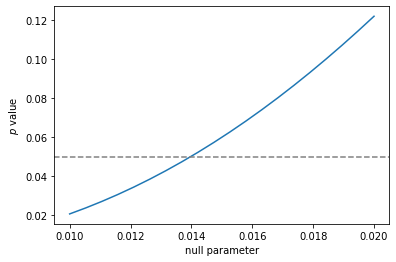

In [9]:
x = np.linspace(0.01, 0.02, 20)
plot_p_value(x, 2 * (1 - sstats.binom.cdf(3 - 1, 45, x)))

Given the data we will reject null hypotheses that assume a probability to get 6 pips that is larger than ~0.183 or lower than ~0.014. For reference, a fair die's parameter is 0.1666.

## Question B

Same but while stopping when getting 3 rolls of 6.

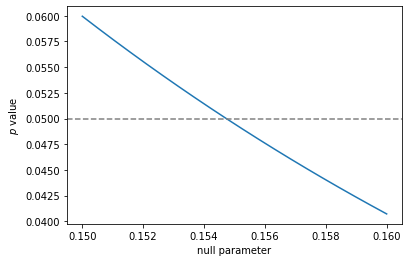

In [10]:
x = np.linspace(0.15, 0.16, 20)
plot_p_value(x, 2 * (1 - sstats.nbinom.cdf(45 - 3 - 1, 3, x)))

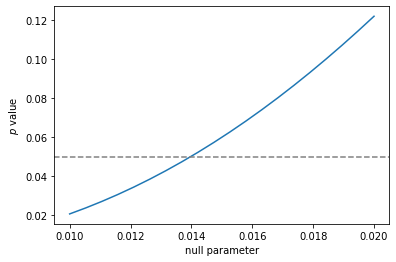

In [11]:
x = np.linspace(0.01, 0.02, 20)
plot_p_value(x, 2 * sstats.nbinom.cdf(45 - 3, 3, x))

When our intention is to stop when we roll 6 pips 3 times the parameters that won't get rejected are within the range 0.014 to 0.145. As shown earlier, because the null paramter is 0.1666 the null hypothesis that the die is fair is rejected in this case.

# Exercise 3

$p$ value when sampling stopped after a fixed time duration. In that fixed time N is uniformly distributed between 40 and 50.

In [12]:
Ns = np.arange(40, 51)
prob_N = 1 / len(Ns)
p = 0
for N in Ns:
    p += 2 * prob_N * sstats.binom.cdf(3, N, p_six)
    
p

0.09547526149441726

In this case we won't reject the null point hypothesis that the die is fair.